In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
import shap

In [3]:
df = pd.read_csv(r'C:\Users\ADMIN\OneDrive\Desktop\TASK\survey_sparrow\data\churn_data\Bank_churn.csv')

In [4]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,churn
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print(df.isnull().sum())

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
churn              0
dtype: int64


In [11]:
df.shape

(10000, 14)

rownumber            int64
customerid           int64
surname             object
creditscore          int64
geography           object
gender              object
age                  int64
tenure               int64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
churn                int64
dtype: object


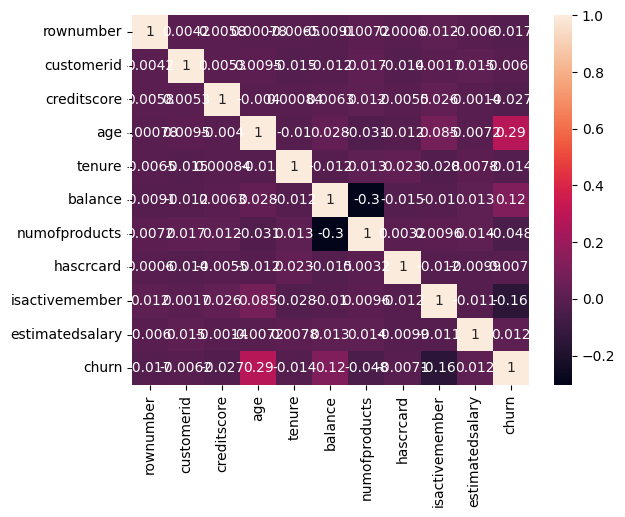

In [13]:
import numpy as np
print(df.dtypes)

df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), annot=True)
plt.show()


In [7]:
print(df.describe())


         rownumber    customerid   creditscore           age        tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             balance  numofproducts    hascrcard  isactivemember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

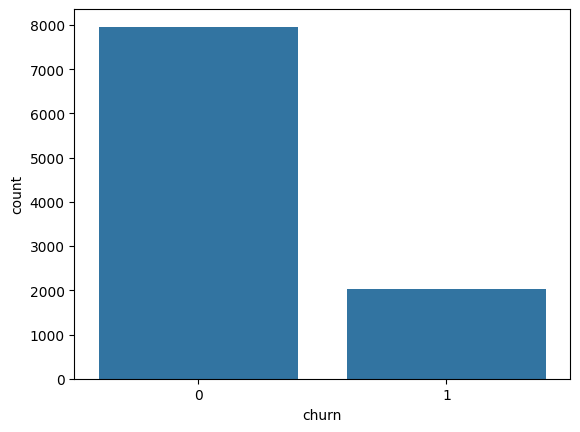

In [14]:
sns.countplot(x='churn', data=df)
plt.show()


In [15]:
def preprocess_data(df):
    df.fillna(df.mean(), inplace=True)
    
    label_enc = LabelEncoder()
    df['category_column'] = label_enc.fit_transform(df['category_column'])
    
    scaler = StandardScaler()
    X = df.drop(columns='churn')
    y = df['churn']
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y


Accuracy: 0.8625
Precision: 0.7587719298245614
Recall: 0.4402035623409669
AUC-ROC: 0.7029891489365071


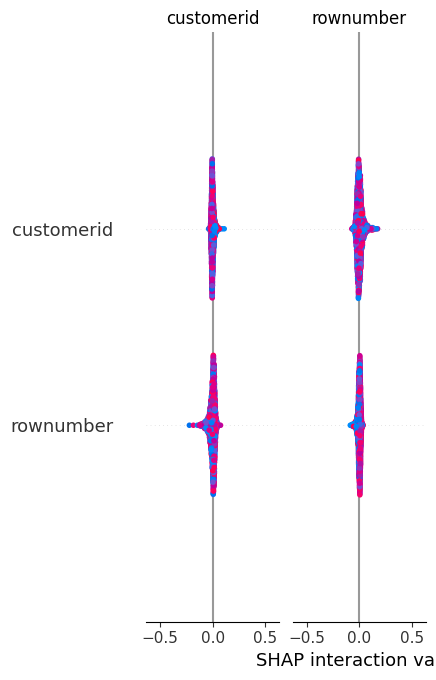

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

def preprocess_data(df):
    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=[float, int]).columns
    categorical_cols = df.select_dtypes(include=[object]).columns
    
    # Fill missing values for numeric columns with their mean
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
    
    # Fill missing values for categorical columns with the most frequent value
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])
    
    # Encode categorical columns
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    # Feature scaling
    X = df.drop(columns='churn')
    y = df['churn']
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y


X, y = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# Step 7: Explainability with SHAP
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names=df.drop(columns='churn').columns)
